<a href="https://colab.research.google.com/github/AhmedHesham3179/Badgewell-Machine-Learning-Internship-Task-/blob/master/Spam_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading dataset

The first task is to read data from .csv file.

In [1]:
import pandas as pd
data = pd.read_csv("spambase.csv")
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


Selecting features and target

In [0]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]


# Data transformations

Standardization

We scale features in range from 0 t0 1.

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)

print('X \n' , X[:10])
print('y \n' , y[:10])

X 
 [[-3.42433707e-01  3.30884903e-01  7.12858774e-01 -4.68995838e-02
   1.15647106e-02 -3.50266176e-01 -2.91793886e-01 -2.62561558e-01
  -3.23302359e-01 -3.71364386e-01 -2.96859527e-01  1.14087333e-01
  -3.12055206e-01 -1.74927167e-01 -1.90114405e-01  8.61714363e-02
  -3.21135414e-01  2.08120664e+00  1.50905374e-01 -1.67893113e-01
   1.25128398e-01 -1.18171509e-01 -2.90209203e-01 -2.12994388e-01
  -3.28814669e-01 -2.99239934e-01 -2.27894812e-01 -2.31830156e-01
  -1.66731450e-01 -2.25239518e-01 -1.60539307e-01 -1.43212021e-01
  -1.74920257e-01 -1.45215148e-01 -1.98067390e-01 -2.42130222e-01
  -3.23455613e-01 -5.98362369e-02 -1.80911344e-01 -1.85303849e-01
  -1.20904684e-01 -1.72599962e-01 -2.05993114e-01 -1.27343320e-01
  -2.97776209e-01 -1.97387481e-01 -7.13879045e-02 -1.11546231e-01
  -1.58453362e-01 -5.14306549e-01 -1.55197675e-01  6.24006575e-01
  -3.08354941e-01 -1.03048405e-01 -4.52472762e-02  4.52979198e-02
  -8.72413388e-03]
 [ 3.45359395e-01  5.19091945e-02  4.35129540e-01 -4.

Split data

Split the data into training and testing sets with 8:2 ratio

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44, shuffle =True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (3680, 57)
X_test shape is  (921, 57)
y_train shape is  (3680,)
y_test shape is  (921,)


# Explantory Data Analysis

nominal {0,1} class attribute of type spam denotes whether the e-mail was considered spam (1) or not (0) 

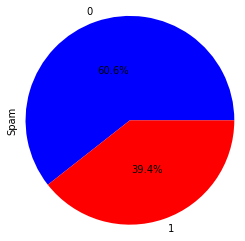

In [5]:
spam_or_not = data["Spam"]
spam_or_not.value_counts()
spam_or_not.value_counts().plot(radius=1.2, kind="pie", autopct='%1.1f%%', pctdistance=0.5, colors=["blue", "red"])

39.4% of e-mails considered spam e-mails

# Model traning

# 1 - Logistic regression model



Import Libraries

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

Applying LogisticRegression Model 

In [7]:
LogisticRegressionModel = LogisticRegression()
LogisticRegressionModel.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Calculating Prediction

In [8]:
y_pred = LogisticRegressionModel.predict(X_test)
y_pred_prob = LogisticRegressionModel.predict_proba(X_test)
print('Predicted Value for LogisticRegressionModel is : ' , y_pred[:1])

Predicted Value for LogisticRegressionModel is :  [0]


Calculating Confusion Matrix

In [9]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

Confusion Matrix is : 
 [[536  26]
 [ 43 316]]


drawing confusion matrix

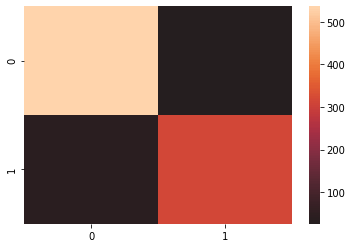

In [10]:
sns.heatmap(CM, center = True)
plt.show()

Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))

In [11]:
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  852


Calculating Area Under the Curve 

In [12]:
fprValue2, tprValue2, thresholdsValue2 = roc_curve(y_test,y_pred)
AUCValue = auc(fprValue2, tprValue2)
print('AUC Value  : ', AUCValue)

AUC Value  :  0.9169797480149486


Ploting the (ROC Curve)

Text(0.5, 0, 'False Positive Rate')

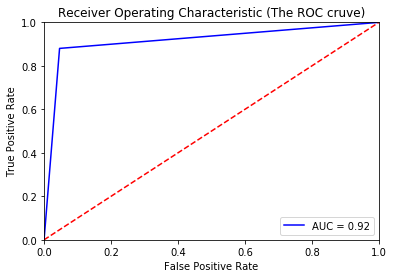

In [13]:
plt.title('Receiver Operating Characteristic (The ROC cruve)')
plt.plot(fprValue2, tprValue2, 'b', label = 'AUC = %0.2f' % AUCValue)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# 2 - SVC Model 



Import Libraries

In [0]:
from sklearn.svm import SVC

Applying SVC Model

In [15]:
SVCModel = SVC(kernel= 'rbf',# it can be also linear,poly,sigmoid,precomputed
               max_iter=1000,C=1.0,gamma='auto')
SVCModel.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=1000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Calculating Prediction

In [16]:
y_pred = SVCModel.predict(X_test)
print('Predicted Value for SVCModel is : ' , y_pred[:1])

Predicted Value for SVCModel is :  [0]


Calculating Confusion Matrix

In [17]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

Confusion Matrix is : 
 [[539  23]
 [ 38 321]]


drawing confusion matrix

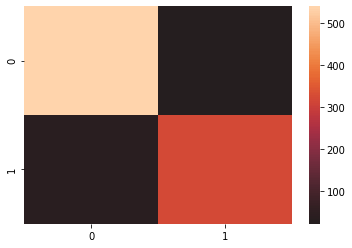

In [18]:
sns.heatmap(CM, center = True)
plt.show()

Calculating Accuracy Score : ((TP + TN) / float(TP + TN + FP + FN))

In [19]:
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  860


Calculating Area Under the Curve

In [20]:
fprValue2, tprValue2, thresholdsValue2 = roc_curve(y_test,y_pred)
AUCValue = auc(fprValue2, tprValue2)
print('AUC Value  : ', AUCValue)

AUC Value  :  0.9266125754616917


Ploting the (ROC Curve)

Text(0.5, 0, 'False Positive Rate')

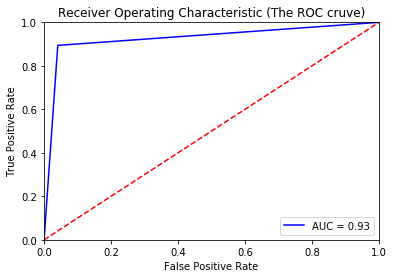

In [21]:
plt.title('Receiver Operating Characteristic (The ROC cruve)')
plt.plot(fprValue2, tprValue2, 'b', label = 'AUC = %0.2f' % AUCValue)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# 3 - Decision Tree Classifier

Import Libraries

In [0]:
from sklearn.tree import DecisionTreeClassifier

Applying DecisionTreeClassifier Model

In [23]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33) #criterion can be entropy
DecisionTreeClassifierModel.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=33, splitter='best')

Calculating Prediction

In [24]:
y_pred = DecisionTreeClassifierModel.predict(X_test)
y_pred_prob = DecisionTreeClassifierModel.predict_proba(X_test)
print('Predicted Value for DecisionTreeClassifierModel is : ' , y_pred[:1])

Predicted Value for DecisionTreeClassifierModel is :  [0]


Calculating Confusion Matrix

In [25]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

Confusion Matrix is : 
 [[512  50]
 [ 56 303]]


drawing confusion matrix

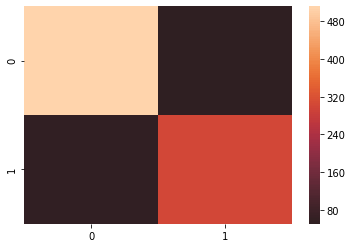

In [26]:
sns.heatmap(CM, center = True)
plt.show()

Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))

In [27]:
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  815


Calculating Area Under the Curve

In [28]:
fprValue2, tprValue2, thresholdsValue2 = roc_curve(y_test,y_pred)
AUCValue = auc(fprValue2, tprValue2)
print('AUC Value  : ', AUCValue)

AUC Value  :  0.8775215852655162


Ploting the (ROC Curve)

Text(0.5, 0, 'False Positive Rate')

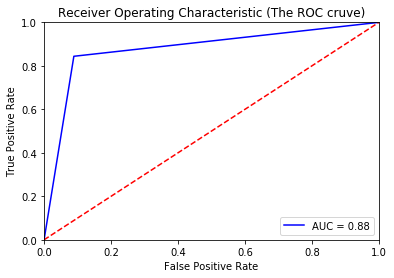

In [29]:
plt.title('Receiver Operating Characteristic (The ROC cruve)')
plt.plot(fprValue2, tprValue2, 'b', label = 'AUC = %0.2f' % AUCValue)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# 4 - Random Forest Classifier Model 

Import Libraries

In [0]:
from sklearn.ensemble import RandomForestClassifier

Applying RandomForestClassifier Model 

In [31]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=2,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=33, verbose=0,
                       warm_start=False)

Calculating Prediction

In [32]:
y_pred = RandomForestClassifierModel.predict(X_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(X_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:1])

Predicted Value for RandomForestClassifierModel is :  [0]


Calculating Confusion Matrix

In [33]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

Confusion Matrix is : 
 [[554   8]
 [ 89 270]]


drawing confusion matrix

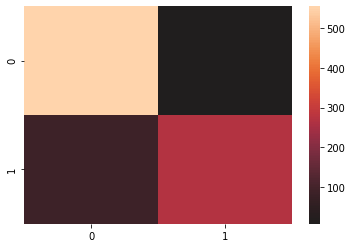

In [34]:
sns.heatmap(CM, center = True)
plt.show()

Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))

In [35]:
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  824


Calculating Area Under the Curve

In [36]:
fprValue2, tprValue2, thresholdsValue2 = roc_curve(y_test,y_pred)
AUCValue = auc(fprValue2, tprValue2)
print('AUC Value  : ', AUCValue)

AUC Value  :  0.8689271305227054


Ploting the (ROC Curve)

Text(0.5, 0, 'False Positive Rate')

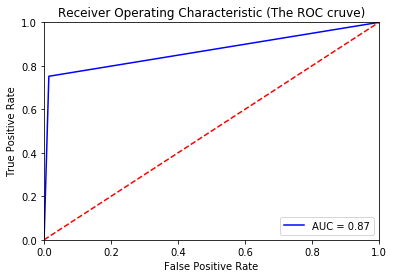

In [37]:
plt.title('Receiver Operating Characteristic (The ROC cruve)')
plt.plot(fprValue2, tprValue2, 'b', label = 'AUC = %0.2f' % AUCValue)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# 5 - Gradient Boosting Classifier Model

Import Libraries

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

Applying GradientBoostingClassifier Model 

In [39]:
GBCModel = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=33) 
GBCModel.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=33, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Calculating Prediction

In [40]:
y_pred = GBCModel.predict(X_test)
y_pred_prob = GBCModel.predict_proba(X_test)
print('Predicted Value for GBCModel is : ' , y_pred[:1])

Predicted Value for GBCModel is :  [0]


Calculating Confusion Matrix

In [41]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

Confusion Matrix is : 
 [[543  19]
 [ 31 328]]


drawing confusion matrix

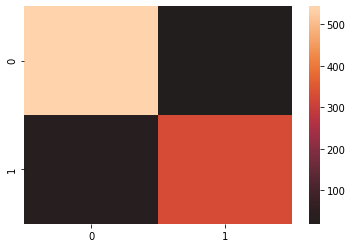

In [42]:
sns.heatmap(CM, center = True)
plt.show()


Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))

In [43]:
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  871


Calculating Area Under the Curve

In [44]:
fprValue2, tprValue2, thresholdsValue2 = roc_curve(y_test,y_pred)
AUCValue = auc(fprValue2, tprValue2)
print('AUC Value  : ', AUCValue)


AUC Value  :  0.9399205979440716


Ploting the (ROC Curve)

Text(0.5, 0, 'False Positive Rate')

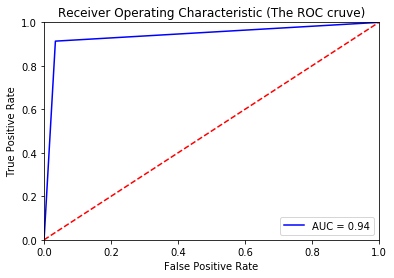

In [45]:
plt.title('Receiver Operating Characteristic (The ROC cruve)')
plt.plot(fprValue2, tprValue2, 'b', label = 'AUC = %0.2f' % AUCValue)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# 6 - KNeighbors Classifier Model 

Import Libraries

In [0]:
from sklearn.neighbors import KNeighborsClassifier

Applying KNeighborsClassifier Model 

In [47]:
KNNClassifierModel = KNeighborsClassifier(n_neighbors= 5,weights ='uniform', # it can be distance
                                          algorithm='auto') # it can be ball_tree, kd_tree,brute
KNNClassifierModel.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Calculating Prediction

In [48]:
y_pred = KNNClassifierModel.predict(X_test)
y_pred_prob = KNNClassifierModel.predict_proba(X_test)
print('Predicted Value for KNNClassifierModel is : ' , y_pred[:1])

Predicted Value for KNNClassifierModel is :  [0]


Calculating Confusion Matrix

In [49]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

Confusion Matrix is : 
 [[527  35]
 [ 54 305]]


drawing confusion matrix

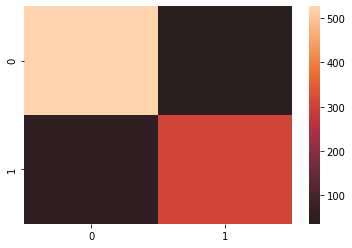

In [50]:
sns.heatmap(CM, center = True)
plt.show()

Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))

In [51]:
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  832


Calculating Area Under the Curve

In [52]:
fprValue2, tprValue2, thresholdsValue2 = roc_curve(y_test,y_pred)
AUCValue = auc(fprValue2, tprValue2)
print('AUC Value  : ', AUCValue)

AUC Value  :  0.8936522963153878


Ploting the (ROC Curve)

Text(0.5, 0, 'False Positive Rate')

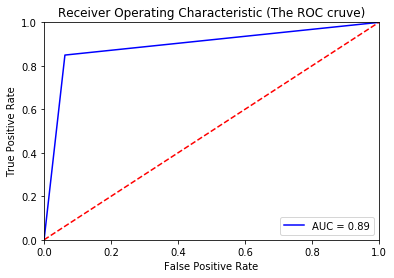

In [53]:
plt.title('Receiver Operating Characteristic (The ROC cruve)')
plt.plot(fprValue2, tprValue2, 'b', label = 'AUC = %0.2f' % AUCValue)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# 7 - GaussianNB Model 

Import Libraries

In [0]:
from sklearn.naive_bayes import GaussianNB

Applying GaussianNB Model 


In [55]:
GaussianNBModel = GaussianNB()
GaussianNBModel.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Calculating Prediction

In [56]:
y_pred = GaussianNBModel.predict(X_test)
y_pred_prob = GaussianNBModel.predict_proba(X_test)
print('Predicted Value for GaussianNBModel is : ' , y_pred[:1])

Predicted Value for GaussianNBModel is :  [0]


Calculating Confusion Matrix

In [57]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

Confusion Matrix is : 
 [[416 146]
 [ 17 342]]


drawing confusion matrix

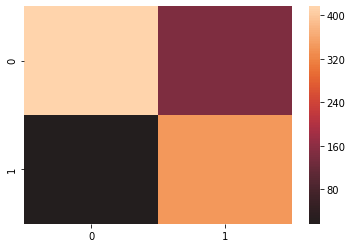

In [58]:
sns.heatmap(CM, center = True)
plt.show()

Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))

In [59]:
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  758


Calculating Area Under the Curve

In [60]:
fprValue2, tprValue2, thresholdsValue2 = roc_curve(y_test,y_pred)
AUCValue = auc(fprValue2, tprValue2)
print('AUC Value  : ', AUCValue)


AUC Value  :  0.8464298813429951


Ploting the (ROC Curve)

Text(0.5, 0, 'False Positive Rate')

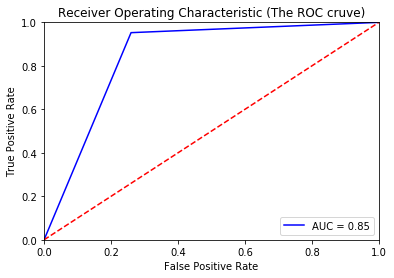

In [61]:
plt.title('Receiver Operating Characteristic (The ROC cruve)')
plt.plot(fprValue2, tprValue2, 'b', label = 'AUC = %0.2f' % AUCValue)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Conclusion

After we analyze all the data and look at many methods of classification, we have some conclusions.
1- As we said in our initial data exploration, we need to find a way to our program get a classifier with an error less than 38% (because, in the worst case of telling that every email is Spam, we have 38% of error).

2- Comparing many methods, we concluded that (in this specific case) the Gradient Boosting Classifier performs better than all methods. The area under the curve of Gradient Boosting Classifier was the highest between all methods (it was around 0.94). Moreover, the accuracy score was the highest between all methods (871) and others rates were. In addition, 347 items are spam from test dataset, generally, the best method in classification.
